# Credit Risk Analysis of Bank debtors

## Introduction

In this project I'll explore the dataset that contains a list of persons who takes a credit by a bank classified as good or bad credit risks according to the set of attributes. 

Credits to this iimproved dataset https://www.kaggle.com/datasets/uciml/german-credit

    Age (numeric)
    Sex (text: male, female)
    Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
    Housing (text: own, rent, or free)
    Saving accounts (text - little, moderate, quite rich, rich)
    Checking account (numeric, in DM - Deutsch Mark)
    Credit amount (numeric, in DM)
    Duration (numeric, in month)
    Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
    Risk (Value target - Good or Bad Risk)

## Import relevant libraries and the dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import textwrap #for text wrapping in visualization

In [2]:
df_credit = pd.read_csv("C:/Users/Shai/OneDrive/Documents/Data science/German credit risk analysis/german_credit_data.csv", index_col=0)

## Data preparation

In [3]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
#Check for null values and blanks and review data types
#From the data we can assume that the customer either have SA or CA or have both ( to be confirmed later)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
# Define mapping dictionary
job_labels = {
    0: "unskilled non-resident",
    1: "unskilled resident",
    2: "skilled",
    3: "highly skilled"
}

# Map numerical values to string labels
df_credit["Job"] = df_credit["Job"].map(job_labels)

In [6]:
df_credit.shape

(1000, 10)

In [7]:
#Age, credit and duration values are spreadout
#I'll assign job as string
df_credit.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [27]:
#Check categorical columns values and count
cat_cols = df_credit.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(df_credit[col].value_counts(normalize=True).round(2), "\n")

male      0.69
female    0.31
Name: Sex, dtype: float64 

skilled                   0.63
unskilled resident        0.20
highly skilled            0.15
unskilled non-resident    0.02
Name: Job, dtype: float64 

own     0.71
rent    0.18
free    0.11
Name: Housing, dtype: float64 

little        0.74
moderate      0.13
quite rich    0.08
rich          0.06
Name: Saving accounts, dtype: float64 

little      0.45
moderate    0.44
rich        0.10
Name: Checking account, dtype: float64 

car                    0.34
radio/TV               0.28
furniture/equipment    0.18
business               0.10
education              0.06
repairs                0.02
domestic appliances    0.01
vacation/others        0.01
Name: Purpose, dtype: float64 

good    0.7
bad     0.3
Name: Risk, dtype: float64 

SA/CA    0.52
SA       0.30
None     0.10
CA       0.08
Name: Bank_account_type, dtype: float64 



## EDA

In [9]:
#Add new column to identify the account type of the bank customers
df_credit['Bank_account_type'] = 'None'

df_credit.loc[df_credit['Saving accounts'].notnull() & df_credit['Checking account'].notnull(), 'Bank_account_type'] = 'SA/CA'
df_credit.loc[df_credit['Saving accounts'].notnull() & df_credit['Checking account'].isnull(), 'Bank_account_type'] = 'SA'
df_credit.loc[df_credit['Saving accounts'].isnull() & df_credit['Checking account'].notnull(), 'Bank_account_type'] = 'CA'

In [10]:
df_credit['Bank_account_type'].value_counts()

SA/CA    522
SA       295
None      99
CA        84
Name: Bank_account_type, dtype: int64

## Risk type

Text(0, 0.5, 'Count of Customers')

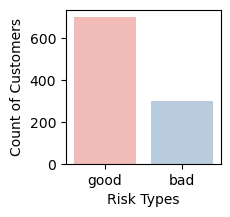

In [11]:
#Risk type
sns.set_palette("Pastel1")
plt.subplots(figsize=(2,2))
sns.countplot(data=df_credit, x='Risk')
plt.xlabel("Risk Types")
plt.ylabel("Count of Customers")
#plt.xticks(rotation=45)

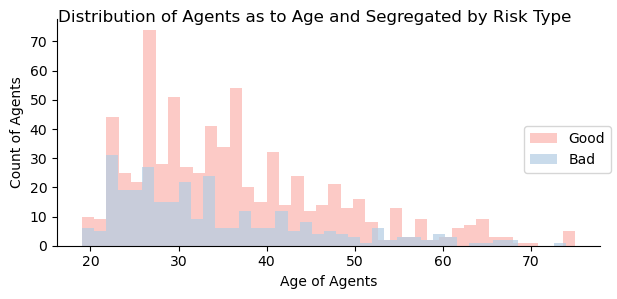

In [20]:
g = sns.FacetGrid(df_credit,hue="Risk",height=3, aspect=2)
g = g.map(plt.hist,'Age',bins=40,alpha=0.7)
g.fig.suptitle("Distribution of Agents as to Age and Segregated by Risk Type")
g.set_axis_labels("Age of Agents", "Count of Agents")
handles, labels = g.axes[0][0].get_legend_handles_labels()
g.fig.legend(handles, ["Good", "Bad"], loc='center right')

In [13]:
#Created a categorical column for age 
interval = (11, 26, 42, 58, 77, 95)

cats = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent Gen']
df_credit["Generation"] = pd.cut(df_credit.Age, interval, labels=cats)

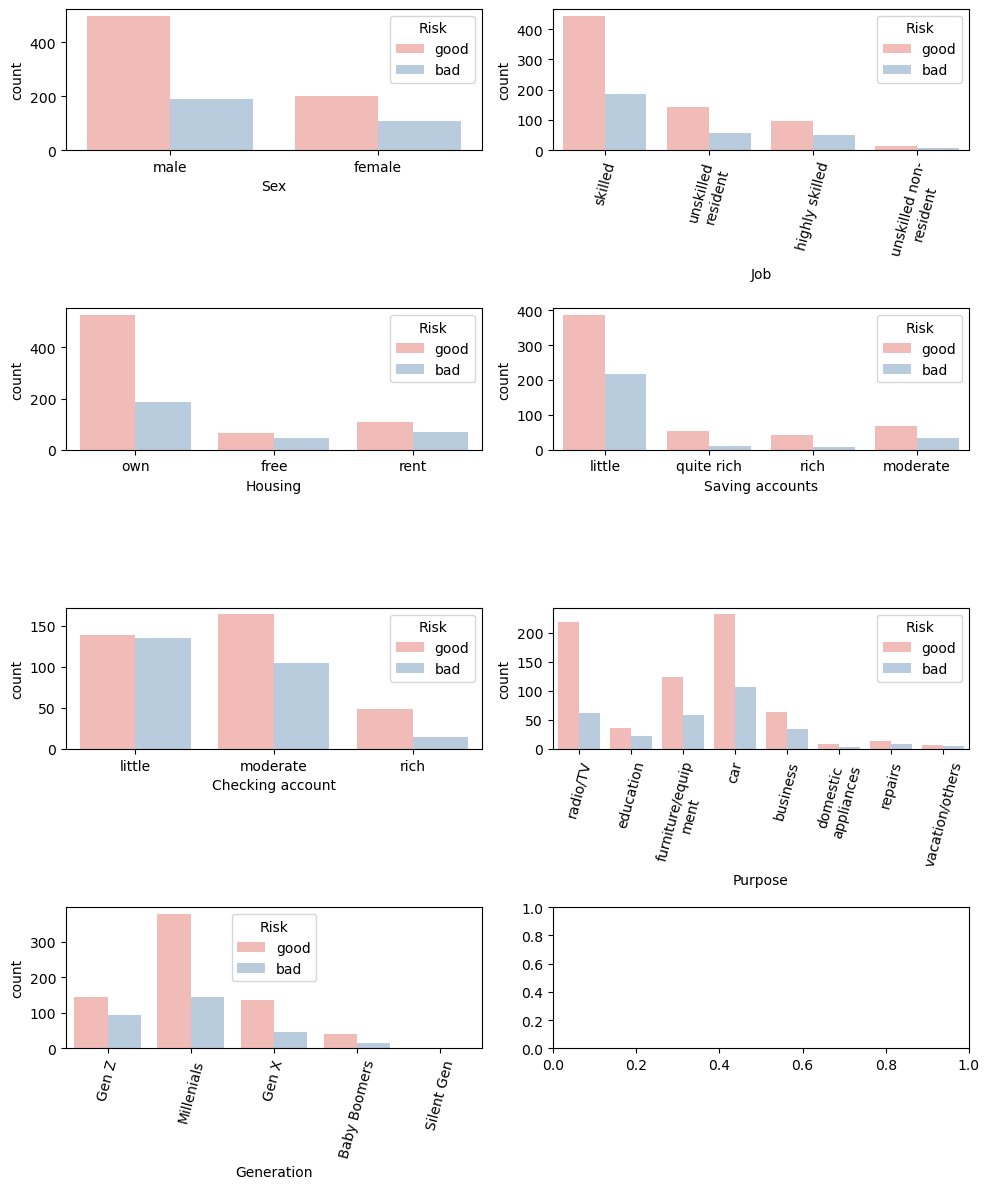

In [39]:
#Categorical values viz
fig, ax = plt.subplots(4,2, figsize=(10,12))
sns.countplot(data=df_credit, x='Sex', hue='Risk',ax = ax[0,0])
sns.countplot(data=df_credit, x='Job', hue='Risk',ax = ax[0,1])
sns.countplot(data=df_credit, x='Housing', hue='Risk',ax = ax[1,0])
sns.countplot(data=df_credit, x='Saving accounts', hue='Risk',ax = ax[1,1])
sns.countplot(data=df_credit, x='Checking account', hue='Risk',ax = ax[2,0])
sns.countplot(data=df_credit, x='Purpose', hue='Risk',ax = ax[2,1])
sns.countplot(data=df_credit, x='Generation', hue='Risk',ax = ax[3,0])


wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[0, 1].get_xticklabels()]
ax[0, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[2, 1].get_xticklabels()]
ax[2, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[3, 0].get_xticklabels()]
ax[3, 0].set_xticklabels(wrapped_labels, rotation=75)
plt.tight_layout()
plt.show()

0      Baby Boomers
1             Gen Z
2             Gen X
3             Gen X
4             Gen X
           ...     
995      Millenials
996      Millenials
997      Millenials
998           Gen Z
999      Millenials
Name: Generation, Length: 1000, dtype: category
Categories (5, object): ['Gen Z' < 'Millenials' < 'Gen X' < 'Baby Boomers' < 'Silent Gen']

## Credit amount

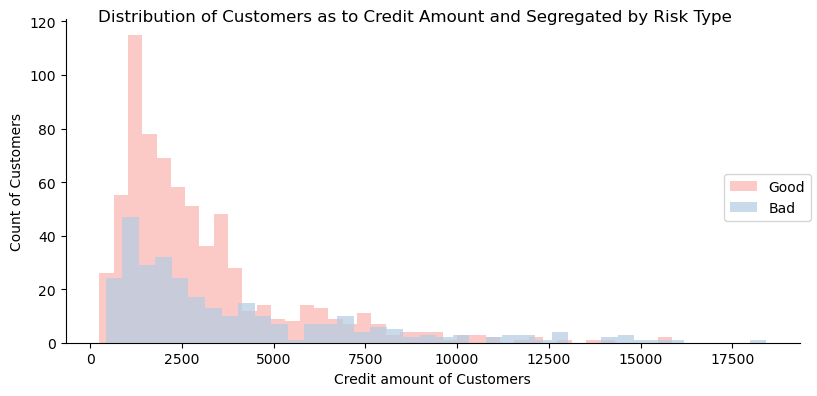

In [23]:
g = sns.FacetGrid(df_credit,hue="Risk",height=4, aspect=2)
g = g.map(plt.hist,'Credit amount',bins= 40, alpha=0.7)
g.fig.suptitle("Distribution of Customers as to Credit Amount and Segregated by Risk Type")
g.set_axis_labels("Credit amount of Customers", "Count of Customers")
handles, labels = g.axes[0][0].get_legend_handles_labels()
g.fig.legend(handles, ["Good", "Bad"], loc='center right')

 age job and risk,
, SA and age, SA and job, credit amt and purpose, purpose and age, credit amt and duration, duration histogram, 
, CA and age, CA and job

In [18]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

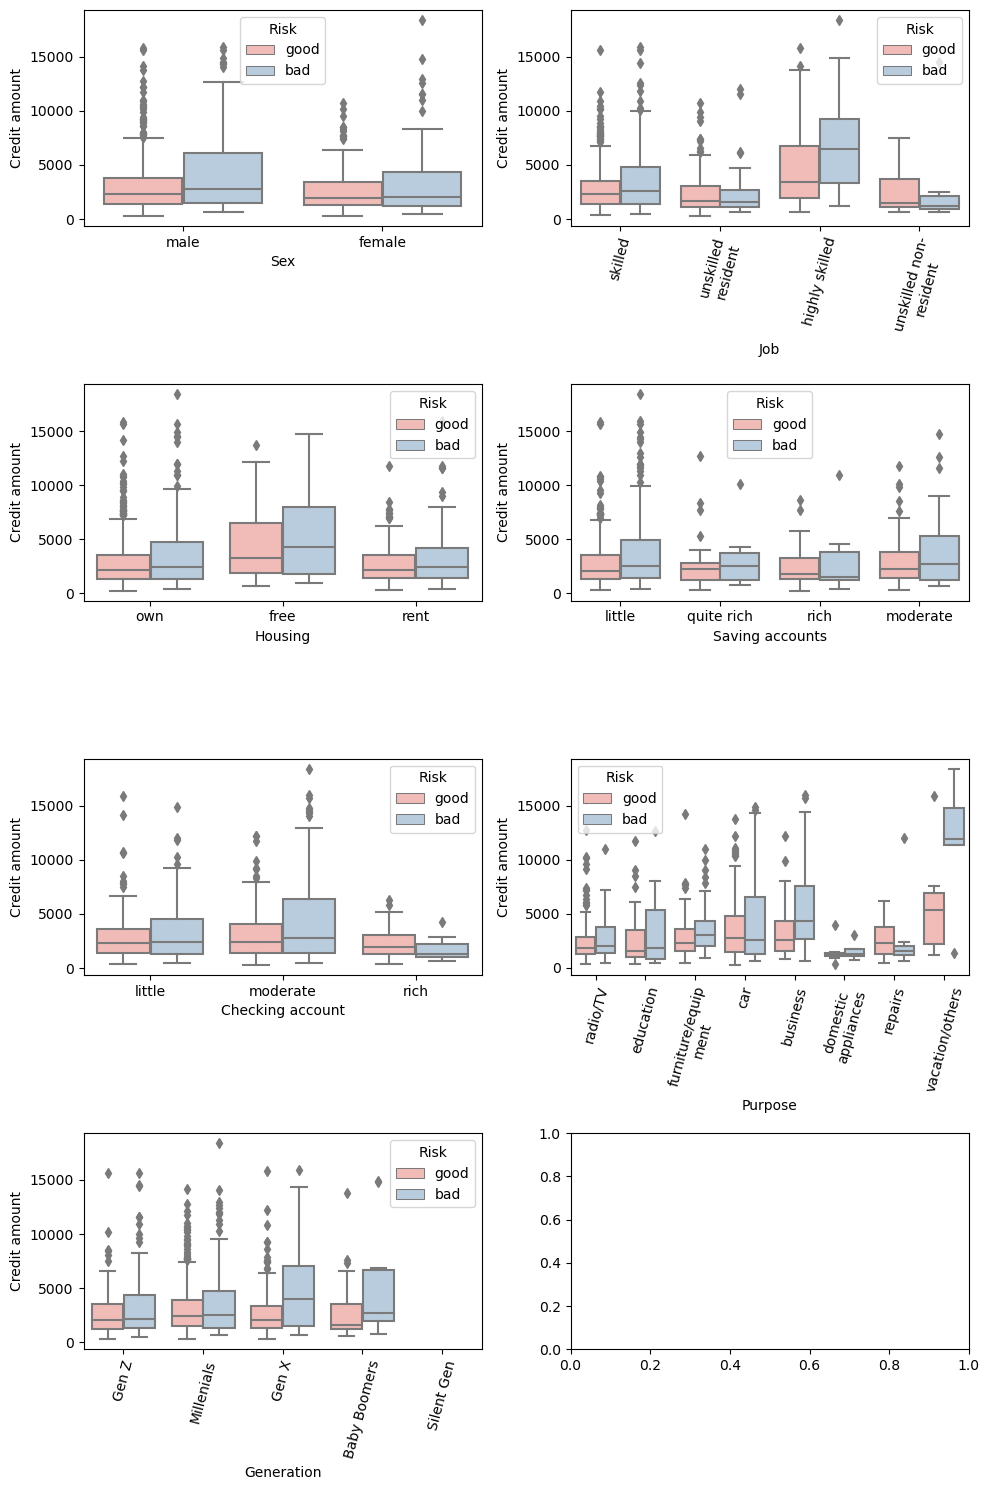

In [41]:
fig, ax = plt.subplots(4,2, figsize=(10,15))
sns.boxplot(data=df_credit, x='Sex', y='Credit amount', hue='Risk',ax = ax[0,0])
sns.boxplot(data=df_credit, x='Job', y='Credit amount', hue='Risk',ax = ax[0,1])
sns.boxplot(data=df_credit, x='Housing', y='Credit amount', hue='Risk',ax = ax[1,0])
sns.boxplot(data=df_credit, x='Saving accounts', y='Credit amount', hue='Risk',ax = ax[1,1])
sns.boxplot(data=df_credit, x='Checking account', y='Credit amount', hue='Risk',ax = ax[2,0])
sns.boxplot(data=df_credit, x='Purpose', y='Credit amount', hue='Risk',ax = ax[2,1])
sns.boxplot(data=df_credit, x='Generation', y='Credit amount', hue='Risk',ax = ax[3,0])

wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[0, 1].get_xticklabels()]
ax[0, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[2, 1].get_xticklabels()]
ax[2, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[3, 0].get_xticklabels()]
ax[3, 0].set_xticklabels(wrapped_labels, rotation=75)
plt.tight_layout()
plt.show()

Violin plot provides a similar summary to a box plot, but with additional information about the density of the data at different values. The width of the violin at a given point represents the density of the data at that point.

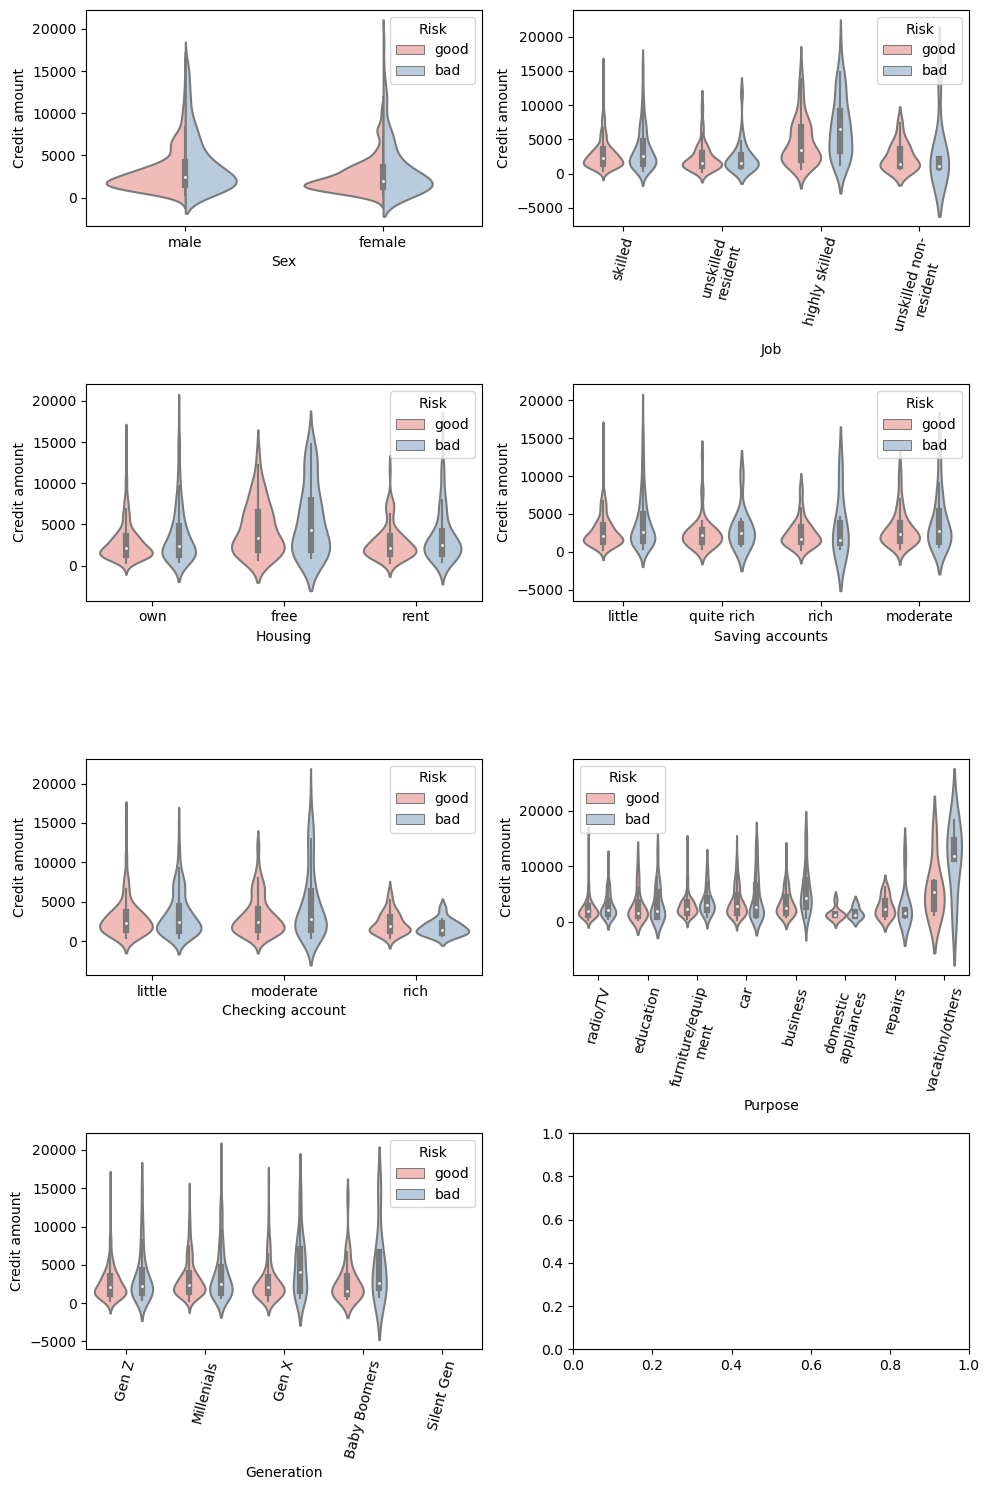

In [43]:
fig, ax = plt.subplots(4,2, figsize=(10,15))
sns.violinplot(data=df_credit, x='Sex', y='Credit amount', hue='Risk',split=True,ax = ax[0,0])
sns.violinplot(data=df_credit, x='Job', y='Credit amount', hue='Risk',ax = ax[0,1])
sns.violinplot(data=df_credit, x='Housing', y='Credit amount', hue='Risk',ax = ax[1,0])
sns.violinplot(data=df_credit, x='Saving accounts', y='Credit amount', hue='Risk',ax = ax[1,1])
sns.violinplot(data=df_credit, x='Checking account', y='Credit amount', hue='Risk',ax = ax[2,0])
sns.violinplot(data=df_credit, x='Purpose', y='Credit amount', hue='Risk',ax = ax[2,1])
sns.violinplot(data=df_credit, x='Generation', y='Credit amount', hue='Risk',ax = ax[3,0])

wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[0, 1].get_xticklabels()]
ax[0, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[2, 1].get_xticklabels()]
ax[2, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[3, 0].get_xticklabels()]
ax[3, 0].set_xticklabels(wrapped_labels, rotation=75)
plt.tight_layout()
plt.show()

## Duration

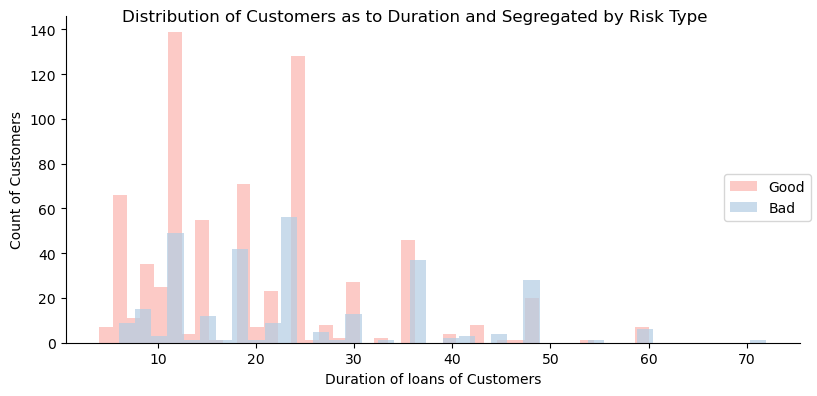

In [22]:
g = sns.FacetGrid(df_credit,hue="Risk",height=4, aspect=2)
g = g.map(plt.hist,'Duration',bins=40,alpha=0.7)
g.fig.suptitle("Distribution of Customers as to Duration and Segregated by Risk Type")
g.set_axis_labels("Duration of loans of Customers", "Count of Customers")
handles, labels = g.axes[0][0].get_legend_handles_labels()
g.fig.legend(handles, ["Good", "Bad"], loc='center right')

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(10,15))
sns.violinplot(data=df_credit, x='Sex', y='Duration', hue='Risk',split=True,ax = ax[0,0])
sns.violinplot(data=df_credit, x='Job', y='Duration', hue='Risk',ax = ax[0,1])
sns.violinplot(data=df_credit, x='Housing', y='Duration', hue='Risk',ax = ax[1,0])
sns.violinplot(data=df_credit, x='Saving accounts', y='Duration', hue='Risk',ax = ax[1,1])
sns.violinplot(data=df_credit, x='Checking account', y='Duration', hue='Risk',ax = ax[2,0])
sns.violinplot(data=df_credit, x='Purpose', y='Duration', hue='Risk',ax = ax[2,1])
sns.violinplot(data=df_credit, x='Generation', y='Duration', hue='Risk',ax = ax[3,0])

wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[0, 1].get_xticklabels()]
ax[0, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[2, 1].get_xticklabels()]
ax[2, 1].set_xticklabels(wrapped_labels, rotation=75)
wrapped_labels = [textwrap.fill(label.get_text(), 15) for label in ax[3, 0].get_xticklabels()]
ax[3, 0].set_xticklabels(wrapped_labels, rotation=75)
plt.tight_layout()
plt.show()